In [1]:
import pickle
import missingno as msno

pd.set_option('display.max_columns', None)

## 데이터 불러오기

In [2]:
# transfermarkt Site
with open('datas/premier_players.pkl', 'rb') as f:
    datas = pickle.load(f)

# whoscored Site
with open('datas/premier_total.pkl', 'rb') as f:
    datas2 = pickle.load(f)

# whoscored Site 추가적인 컬럼 데이터
with open('datas/summary.pkl', 'rb') as f:
    summary = pickle.load(f)

In [3]:
print(datas.shape)
datas.tail()

(516, 21)


,name,market_value,app,conceded_goals,clean_sheets,yellow_card,second_yell,red_card,age,height,citizenship,position,foot,agent,club,joined,expire,last_contract,outfitter,sns,caps_goals
511,Robert Snodgrass,£1.80m,11,-,-,2,-,-,33,"1,82 m",1,attack-RightWinger,left,SMI Sports Management,West Bromwich Albion,"Jan 8, 2021","Jun 30, 2022","Aug 31, 2019",Nike,2,4.0
512,Karlan Grant,£8.10m,18,1,-,1,-,-,23,"1,83 m",1,attack-Centre-Forward,right,ICM Stellar Sports,West Bromwich Albion,"Oct 15, 2020","Jun 30, 2026","Aug 31, 2019",adidas,2,None
513,Callum Robinson,£5.40m,25,5,-,-,-,-,26,"1,78 m",1,attack-Centre-Forward,right,Wasserman,West Bromwich Albion,"Sep 9, 2020","Jun 30, 2025","Aug 31, 2019",adidas,2,17.0
514,Mbaye Diagne,£2.70m,13,2,2,2,-,-,29,"1,91 m",1,attack-Centre-Forward,right,GOAL CLUB,West Bromwich Albion,"Jan 29, 2021","Jun 30, 2021","Aug 31, 2019",adidas,1,None
515,Hal Robson-Kanu,£1.62m,15,-,-,1,-,-,31,"1,83 m",1,attack-Centre-Forward,left,no agent,West Bromwich Albion,"Aug 31, 2016","Jun 30, 2021","Jul 6, 2017",adidas,2,9.2


In [4]:
print(datas2.shape)
datas2.tail()

(516, 30)


,Apps,Mins,Tackles,Inter,Fouls,Offsides,Clear,Drbed,Blocks,OwnG,Rating_x,Position,Team,Age,name,Assists,KeyP,AvgP,PS%,Crosses,LongB,ThrB,Rating_y,Goals,SpG,Drb,Fouled,Off,Disp,UnsTch
511,0(1),9,0,0,0,0,0,1,0,0,5.74,"AM(C),FW",Man Utd,31,Odion Ighalo,0,0,2.0,100,0,0,0,5.74,0,0,0,0,0,2,1
512,1(1),3,1,0,0.5,0,0,0,0,0,5.68,Midfielder,Southampton,19,Alexandre Jankewitz,0,0,1.5,66.7,0,0,0,5.68,0,0,0,0.5,0,0,0.5
513,1,90,0,0,0,0,0,0,0,0,5.65,GK,Fulham,24,Marek Rodák,0,0,25.0,76,0,8,0,5.65,0,0,0,0,0,0,0
514,1,90,0,0,0,0,0,0,0,0,5.41,GK,Chelsea,39,Willy Caballero,0,0,24.0,91.7,0,2,0,5.41,0,0,0,0,0,0,0
515,1,90,5,0,1,1,3,0,0,0,5.06,Defender,Southampton,20,Kayne Ramsay,0,0,19.0,78.9,0,0,0,5.06,0,0,0,0,0,0,0


In [5]:
print(summary.shape)
summary.head()

(511, 3)


,name,AerialsWon,MotM
0,HarryKane,2.2,12
1,JackGrealish,1.1,4
2,KevinDeBruyne,0.2,7
3,KortneyHause,7,-
4,JesseLingard,-,2


## whoscored 데이터셋 merge

In [6]:
# 합치기 전에 두 dataframe의 name 컬럼 전처리
datasets = [datas, datas2]
for dataset in datasets:
    dataset['name'] = dataset['name'].apply(lambda x: x.strip())
    dataset['name'] = dataset['name'].apply(lambda x: x.replace(" ", "").replace("-", ""))
    dataset['sort_name'] = dataset['name'].apply(lambda x: "".join(sorted(x.lower())))

In [7]:
datas2 = pd.merge(datas2, summary, on='name', how='left')
datas2

,Apps,Mins,Tackles,Inter,Fouls,Offsides,Clear,Drbed,Blocks,OwnG,Rating_x,Position,Team,Age,name,Assists,KeyP,AvgP,PS%,Crosses,LongB,ThrB,Rating_y,Goals,SpG,Drb,Fouled,Off,Disp,UnsTch,sort_name,AerialsWon,MotM
0,30,2637,0.7,0.3,0.9,0,1.2,0.5,0.3,0,7.81,"AM(C),FW",Tottenham,27,HarryKane,13,1.4,26.0,69.5,0.2,1.9,0.1,7.81,21,3.9,1.3,1.8,0.3,1.6,1.9,aaehknrry,2.2,12
1,22,1977,1.2,0.5,1.7,0,0.1,0.4,0.1,0,7.73,AM(CL),Villa,25,JackGrealish,10,3.4,40.9,83.2,0.7,1.3,0.1,7.73,6,2.1,2.8,4.5,0.3,1.5,2.1,aaceghijklrs,1.1,4
2,22(2),1911,1.4,0.4,1.0,0,0.3,1.3,0,0,7.56,"M(CLR),FW",City,29,KevinDeBruyne,11,3,50.3,81.7,1.5,2.5,0.2,7.56,5,3.3,1.8,1.3,0,1.3,1.8,bdeeeiknnruvy,0.2,7
3,4,360,0.8,1.3,0.5,0.5,6.5,0.3,0,0,7.53,D(CL),Villa,25,KortneyHause,0,0,35.3,75.2,0,1.0,0,7.53,1,0.8,0,0.3,0,0,0.3,aeehknorstuy,7,-
4,11,976,0.7,0.4,1.5,0,0,0.5,0,0,7.46,"AM(CLR),FW",Ham,28,JesseLingard,3,0.9,36.2,80.7,0.4,0.9,0,7.46,9,3.0,1.3,1.6,0.4,1.3,1.7,adeegijlnrss,-,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519,0(1),9,0,0,0,0,0,1,0,0,5.74,"AM(C),FW",Man Utd,31,OdionIghalo,0,0,2.0,100,0,0,0,5.74,0,0,0,0,0,2,1,adghiilnooo,-,-
520,1(1),3,1,0,0.5,0,0,0,0,0,5.68,Midfielder,Southampton,19,AlexandreJankewitz,0,0,1.5,66.7,0,0,0,5.68,0,0,0,0.5,0,0,0.5,aaadeeeijklnnrtwxz,-,-
521,1,90,0,0,0,0,0,0,0,0,5.65,GK,Fulham,24,MarekRodák,0,0,25.0,76,0,8,0,5.65,0,0,0,0,0,0,0,adekkmorrá,-,-
522,1,90,0,0,0,0,0,0,0,0,5.41,GK,Chelsea,39,WillyCaballero,0,0,24.0,91.7,0,2,0,5.41,0,0,0,0,0,0,0,aabceillllorwy,-,-


In [8]:
datas2['name'].value_counts()[:9]

Rodrigo                 8
TakumiMinamino          4
TheoWalcott             2
MatRyan                 2
JosephWillock           2
RobertSnodgrass         2
RossBarkley             2
RubenLoftusCheek        2
AinsleyMaitlandNiles    2
Name: name, dtype: int64

In [9]:
remove_names = list(datas2['name'].value_counts()[:9].index)
remove_names

['Rodrigo',
 'TakumiMinamino',
 'TheoWalcott',
 'MatRyan',
 'JosephWillock',
 'RobertSnodgrass',
 'RossBarkley',
 'RubenLoftusCheek',
 'AinsleyMaitlandNiles']

In [10]:
datas2[datas2['name'].isin(remove_names)].sort_values('name')

,Apps,Mins,Tackles,Inter,Fouls,Offsides,Clear,Drbed,Blocks,OwnG,Rating_x,Position,Team,Age,name,Assists,KeyP,AvgP,PS%,Crosses,LongB,ThrB,Rating_y,Goals,SpG,Drb,Fouled,Off,Disp,UnsTch,sort_name,AerialsWon,MotM
354,5(6),486,1,1.3,0.5,0.1,0.5,0.4,0.2,0,6.44,"D(LR),M(CLR)",Arsenal,23,AinsleyMaitlandNiles,0,0.2,22.8,78.1,0.2,0.9,0,6.44,0,0.2,0.5,0.3,0.2,0.6,0.9,aaadeeiiilllmnnnssty,0.4,-
268,11,986,1.9,0.9,0.6,0,1.5,1.3,0.1,0,6.59,"D(LR),M(CLR)",Brom,23,AinsleyMaitlandNiles,0,0.2,28.4,77.2,0.1,1.2,0,6.59,0,0.7,1.3,1.2,0,2.1,2.2,aaadeeiiilllmnnnssty,0.4,-
425,2(5),235,0.9,0.4,0.9,0,0,0.6,0.1,0,6.25,M(C),Arsenal,21,JosephWillock,0,0.3,12.4,78.2,0,0.1,0,6.25,0,0.6,0.6,0.6,0,0.4,1.9,cehijklloopsw,0.9,-
116,7(3),638,1.9,1.4,0.9,0,0.8,2.6,0.1,0,6.87,M(C),Newcastle,21,JosephWillock,0,0.6,14.7,74.1,0.2,0.6,0,6.87,4,0.9,1.3,0.6,0,1.4,1.7,cehijklloopsw,0.9,-
471,11,990,0.1,0,0.1,0,1.1,0,0,0,6.12,GK,Brighton,29,MatRyan,0,0,31.8,77.1,0,5.2,0,6.12,0,0,0,0,0,0,0,aamnrty,0.3,-
82,2,180,0,0,0,0,0.5,0,0,0,6.94,GK,Arsenal,29,MatRyan,0,0.5,13.5,92.6,0,1.0,0,6.94,0,0,0,0,0,0,0,aamnrty,0.3,-
316,6(2),527,2.1,0.1,1.0,0.1,1.5,0.8,0.3,0,6.51,M(CLR),Brom,33,RobertSnodgrass,0,0.4,16.5,78.8,0.4,0.5,0,6.51,0,0.5,0.5,1.6,0.1,0.5,1.0,abdegnoorrrssst,1.1,-
491,0(3),4,0,0,0,0,0,0,0,0,6.00,M(CLR),Ham,33,RobertSnodgrass,0,0,1.3,100,0,0,0,6.00,0,0,0,0.3,0,0,0,abdegnoorrrssst,1.1,-
16,27(2),2355,2.0,1.1,1.3,0,1.6,1.0,0.2,0,7.22,DMC,City,24,Rodrigo,1,0.9,81.8,91.0,0.1,4.4,0,7.22,2,1.0,0.8,1.0,0.1,0.6,0.7,dgioorr,2.5,1
293,12(9),1093,0.6,0.2,0.8,0,0.6,0.8,0,0,6.54,"M(CLR),FW",Leeds,30,Rodrigo,1,1.1,23.3,77.3,0.1,1,0.1,6.54,3,1.8,0.7,0.3,0.1,0.8,1.7,dgioorr,2.5,1


In [11]:
datas2.drop(index=[354, 425, 82, 491, 293, 291, 19, 18, 17, 292, 396, 432, 343, 366, 367, 515], inplace=True)

In [12]:
datas2['name'].value_counts()[:3]

Rodrigo              2
GabrielMartinelli    1
JoachimAndersen      1
Name: name, dtype: int64

In [13]:
datas2[datas2['name'].isin(remove_names)].sort_values('name')

,Apps,Mins,Tackles,Inter,Fouls,Offsides,Clear,Drbed,Blocks,OwnG,Rating_x,Position,Team,Age,name,Assists,KeyP,AvgP,PS%,Crosses,LongB,ThrB,Rating_y,Goals,SpG,Drb,Fouled,Off,Disp,UnsTch,sort_name,AerialsWon,MotM
268,11,986,1.9,0.9,0.6,0,1.5,1.3,0.1,0,6.59,"D(LR),M(CLR)",Brom,23,AinsleyMaitlandNiles,0,0.2,28.4,77.2,0.1,1.2,0,6.59,0,0.7,1.3,1.2,0,2.1,2.2,aaadeeiiilllmnnnssty,0.4,-
116,7(3),638,1.9,1.4,0.9,0,0.8,2.6,0.1,0,6.87,M(C),Newcastle,21,JosephWillock,0,0.6,14.7,74.1,0.2,0.6,0,6.87,4,0.9,1.3,0.6,0,1.4,1.7,cehijklloopsw,0.9,-
471,11,990,0.1,0,0.1,0,1.1,0,0,0,6.12,GK,Brighton,29,MatRyan,0,0,31.8,77.1,0,5.2,0,6.12,0,0,0,0,0,0,0,aamnrty,0.3,-
316,6(2),527,2.1,0.1,1.0,0.1,1.5,0.8,0.3,0,6.51,M(CLR),Brom,33,RobertSnodgrass,0,0.4,16.5,78.8,0.4,0.5,0,6.51,0,0.5,0.5,1.6,0.1,0.5,1.0,abdegnoorrrssst,1.1,-
16,27(2),2355,2.0,1.1,1.3,0,1.6,1.0,0.2,0,7.22,DMC,City,24,Rodrigo,1,0.9,81.8,91.0,0.1,4.4,0,7.22,2,1.0,0.8,1.0,0.1,0.6,0.7,dgioorr,2.5,1
294,12(9),1093,0.6,0.2,0.8,0,0.6,0.8,0,0,6.54,"M(CLR),FW",Leeds,30,Rodrigo,1,1.1,23.3,77.3,0.1,1,0.1,6.54,3,1.8,0.7,0.3,0.1,0.8,1.7,dgioorr,0.8,-
175,15(6),1305,0.2,0.2,0.5,0,0.2,0.6,0,0,6.75,M(CLR),Villa,27,RossBarkley,1,1.6,28.3,84.7,0.9,1.3,0,6.75,3,1.7,1.1,0.7,0.2,1.4,1.5,abeklorrssy,0.9,-
300,21(6),1825,0.9,0.2,1,0,0.5,0.6,0.1,0,6.54,M(CLR),Fulham,25,RubenLoftusCheek,0,0.6,24.6,80.1,0.1,0.3,0,6.54,1,1.3,1.4,1.7,0.1,1.4,2.7,bceeefhklnorstuu,1.6,-
342,5(1),413,0.5,0,0.3,0,0.5,0.8,0,0,6.46,"AM(CL),FW",Southampton,26,TakumiMinamino,0,0.3,25.7,72.7,0,0.8,0,6.46,2,1.5,0.3,0.8,0.2,0.3,1.3,aaiiikmmmnnotu,0.3,-
277,18,1471,1.1,0.7,0.7,0.1,0.1,1.2,0,0,6.56,"M(CLR),FW",Southampton,32,TheoWalcott,3,0.8,20.1,74.5,0.3,0.2,0,6.56,2,1.6,0.9,1.5,0.4,1.3,2.9,acehlootttw,-,-


In [14]:
# MotM(Match of the Man)의 결측치 처리
datas2['MotM'] = datas2['MotM'].replace('-',0)
datas2['MotM'] = datas2['MotM'].fillna(0)
datas2['MotM'] = datas2['MotM'].astype(int)

# AerialWon의 결측치 처리
datas2['AerialsWon'] = datas2['AerialsWon'].replace('-',0)
datas2['AerialsWon'] = datas2['AerialsWon'].fillna(0)
datas2['AerialsWon'] = datas2['AerialsWon'].astype(float)

In [15]:
print(datas2.shape)
datas2

(508, 33)


,Apps,Mins,Tackles,Inter,Fouls,Offsides,Clear,Drbed,Blocks,OwnG,Rating_x,Position,Team,Age,name,Assists,KeyP,AvgP,PS%,Crosses,LongB,ThrB,Rating_y,Goals,SpG,Drb,Fouled,Off,Disp,UnsTch,sort_name,AerialsWon,MotM
0,30,2637,0.7,0.3,0.9,0,1.2,0.5,0.3,0,7.81,"AM(C),FW",Tottenham,27,HarryKane,13,1.4,26.0,69.5,0.2,1.9,0.1,7.81,21,3.9,1.3,1.8,0.3,1.6,1.9,aaehknrry,2.2,12
1,22,1977,1.2,0.5,1.7,0,0.1,0.4,0.1,0,7.73,AM(CL),Villa,25,JackGrealish,10,3.4,40.9,83.2,0.7,1.3,0.1,7.73,6,2.1,2.8,4.5,0.3,1.5,2.1,aaceghijklrs,1.1,4
2,22(2),1911,1.4,0.4,1.0,0,0.3,1.3,0,0,7.56,"M(CLR),FW",City,29,KevinDeBruyne,11,3,50.3,81.7,1.5,2.5,0.2,7.56,5,3.3,1.8,1.3,0,1.3,1.8,bdeeeiknnruvy,0.2,7
3,4,360,0.8,1.3,0.5,0.5,6.5,0.3,0,0,7.53,D(CL),Villa,25,KortneyHause,0,0,35.3,75.2,0,1.0,0,7.53,1,0.8,0,0.3,0,0,0.3,aeehknorstuy,7.0,0
4,11,976,0.7,0.4,1.5,0,0,0.5,0,0,7.46,"AM(CLR),FW",Ham,28,JesseLingard,3,0.9,36.2,80.7,0.4,0.9,0,7.46,9,3.0,1.3,1.6,0.4,1.3,1.7,adeegijlnrss,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519,0(1),9,0,0,0,0,0,1,0,0,5.74,"AM(C),FW",Man Utd,31,OdionIghalo,0,0,2.0,100,0,0,0,5.74,0,0,0,0,0,2,1,adghiilnooo,0.0,0
520,1(1),3,1,0,0.5,0,0,0,0,0,5.68,Midfielder,Southampton,19,AlexandreJankewitz,0,0,1.5,66.7,0,0,0,5.68,0,0,0,0.5,0,0,0.5,aaadeeeijklnnrtwxz,0.0,0
521,1,90,0,0,0,0,0,0,0,0,5.65,GK,Fulham,24,MarekRodák,0,0,25.0,76,0,8,0,5.65,0,0,0,0,0,0,0,adekkmorrá,0.0,0
522,1,90,0,0,0,0,0,0,0,0,5.41,GK,Chelsea,39,WillyCaballero,0,0,24.0,91.7,0,2,0,5.41,0,0,0,0,0,0,0,aabceillllorwy,0.0,0


## transfermarkt과 whoscored 데이터셋 merge

#### merge 전에 중복데이터 존재유무 파악

In [16]:
print(datas['sort_name'].value_counts()[:2])
datas[datas['sort_name'] == "abdeeinsv"]

abdeeinsv       2
adefilnnnoor    1
Name: sort_name, dtype: int64


,name,market_value,app,conceded_goals,clean_sheets,yellow_card,second_yell,red_card,age,height,citizenship,position,foot,agent,club,joined,expire,last_contract,outfitter,sns,caps_goals,sort_name
33,BenDavies,£2.70m,-,-,-,-,-,-,25,"1,85 m",1,Defender-Centre-Back,left,CAA Base Ltd,Liverpool FC,"Feb 1, 2021","Jun 30, 2025","Aug 7, 2019",adidas,1,None,abdeeinsv
117,BenDavies,£14.40m,20,-,2,1,-,-,28,"1,81 m",1,Defender-Left-Back,left,ICM Stellar Sports,Tottenham Hotspur,"Jul 23, 2014","Jun 30, 2024","Jul 8, 2019",adidas,2,None,abdeeinsv


-> 서로 다른 player

In [17]:
print(datas2['sort_name'].value_counts()[:2])
datas2[datas2['sort_name'] == "dgioorr"]

dgioorr          2
aaccehjmmrsty    1
Name: sort_name, dtype: int64


,Apps,Mins,Tackles,Inter,Fouls,Offsides,Clear,Drbed,Blocks,OwnG,Rating_x,Position,Team,Age,name,Assists,KeyP,AvgP,PS%,Crosses,LongB,ThrB,Rating_y,Goals,SpG,Drb,Fouled,Off,Disp,UnsTch,sort_name,AerialsWon,MotM
16,27(2),2355,2.0,1.1,1.3,0,1.6,1.0,0.2,0,7.22,DMC,City,24,Rodrigo,1,0.9,81.8,91.0,0.1,4.4,0,7.22,2,1.0,0.8,1.0,0.1,0.6,0.7,dgioorr,2.5,1
294,12(9),1093,0.6,0.2,0.8,0,0.6,0.8,0,0,6.54,"M(CLR),FW",Leeds,30,Rodrigo,1,1.1,23.3,77.3,0.1,1,0.1,6.54,3,1.8,0.7,0.3,0.1,0.8,1.7,dgioorr,0.8,0


-> 동명이인 player

In [18]:
print(datas.shape)
datas.tail(2)

(516, 22)


,name,market_value,app,conceded_goals,clean_sheets,yellow_card,second_yell,red_card,age,height,citizenship,position,foot,agent,club,joined,expire,last_contract,outfitter,sns,caps_goals,sort_name
514,MbayeDiagne,£2.70m,13,2,2,2,-,-,29,"1,91 m",1,attack-Centre-Forward,right,GOAL CLUB,West Bromwich Albion,"Jan 29, 2021","Jun 30, 2021","Aug 31, 2019",adidas,1,None,aabdeegimny
515,HalRobsonKanu,£1.62m,15,-,-,1,-,-,31,"1,83 m",1,attack-Centre-Forward,left,no agent,West Bromwich Albion,"Aug 31, 2016","Jun 30, 2021","Jul 6, 2017",adidas,2,9.2,aabhklnnoorsu


In [19]:
print(datas2.shape)
datas2.tail(2)

(508, 33)


,Apps,Mins,Tackles,Inter,Fouls,Offsides,Clear,Drbed,Blocks,OwnG,Rating_x,Position,Team,Age,name,Assists,KeyP,AvgP,PS%,Crosses,LongB,ThrB,Rating_y,Goals,SpG,Drb,Fouled,Off,Disp,UnsTch,sort_name,AerialsWon,MotM
522,1,90,0,0,0,0,0,0,0,0,5.41,GK,Chelsea,39,WillyCaballero,0,0,24.0,91.7,0,2,0,5.41,0,0,0,0,0,0,0,aabceillllorwy,0.0,0
523,1,90,5,0,1,1,3,0,0,0,5.06,Defender,Southampton,20,KayneRamsay,0,0,19.0,78.9,0,0,0,5.06,0,0,0,0,0,0,0,aaaekmnrsyy,0.0,0


#### transfermarkt(datas)의 전처리
- value
    - `-` : 값이 0인 데이터 -> 0으로 replace
- column
    - market_value
        - £ 제거
        - m, Th. 단위환산
    - height
        - `,`와 `m` 제거
    - joined, last_contract, expire
        - datetime dtype으로 변환을 위한 전처리

In [20]:
# market_value의 단위를 변환해주는 함수 
def converter(value):
    if value == "one":
        m_value = np.NaN
    elif value[-1] == "m":
        m_value = int(value.replace('m', '0000').replace('.', ''))
    elif value[-3:] == "Th.":
        m_value = int(value.replace('Th.', '000').replace('.', ''))
    return m_value


# 날짜 데이터 전처리 함수
mon_datas = {"Jan": "1", "Feb": "2", "Mar": "3", "Apr": "4", "May": "5", "Jun": "6",
            "Jul": "7", "Aug": "8", "Sep": "9", "Oct": "10", "Nov": "11", "Dec": "12"}

def converter_date(date):
    try:
        mon, year = date.split(",")
        year = year.strip()
        mon, day = mon.split(" ")
        for key, value in mon_datas.items():
            mon = mon.replace(key, str(value))
            
        result = year + "-" + mon + "-" + day
    except:
        result = None
    
    return result

In [21]:
datas.replace({'-': '0'}, inplace=True)

datas["market_value"] = datas["market_value"].apply(lambda x: str(x)[1:])
datas['market_value'] = datas['market_value'].apply(converter)

datas['height'] = datas['height'].apply(lambda x: x.replace('m', '').replace(',', '').strip())

datas['joined'] = datas['joined'].apply(converter_date)
datas['last_contract'] = datas['last_contract'].apply(converter_date)
datas['expire'] = datas['expire'].apply(converter_date)

#### 결측치 Imputation

In [22]:
datas[datas['market_value'].isnull()]

,name,market_value,app,conceded_goals,clean_sheets,yellow_card,second_yell,red_card,age,height,citizenship,position,foot,agent,club,joined,expire,last_contract,outfitter,sns,caps_goals,sort_name
98,HannibalMejbri,NaN,18,3,8,5,0,1,18,182,1,midfield-CentralMidfield,right,Fabio Mello Sports,Manchester United U23,2020-7-1,2026-6-30,2021-3-16,adidas,1,1.5,aabbehiijlmnnr
103,AnthonyElanga,NaN,15,7,2,0,0,0,19,178,1,attack-LeftWinger,right,ICM Stellar Sports,Manchester United U23,2020-7-1,None,2021-3-16,Nike,2,2.5,aaaeghlnnnoty
211,AndreasSöndergaard,NaN,16,21,7,0,0,0,20,188,1,Goalkeeper,right,New Era Global Sports,Wolverhampton Wanderers U23,2018-1-26,2023-6-30,2020-12-17,Puma,1,NaN,aaaadddeegnnrrrssö
317,SamMcQueen,NaN,None,None,None,None,None,None,26,181,1,Defender-Left-Back,left,New Vision,Southampton FC,2016-7-1,2021-6-30,2016-12-5,Nike,2,NaN,aceemmnqsu
400,OuasimBouy,NaN,None,None,None,None,None,None,27,181,1,midfield-DefensiveMidfield,left,Mino Raiola,Leeds United,2017-8-1,2021-6-30,2019-9-9,Nike,1,6.0,abimoosuuy
443,SimonMoore,NaN,None,None,None,None,None,None,30,191,1,Goalkeeper,right,Wasserman,Sheffield United,2016-8-19,2021-6-30,2018-7-26,Nike,1,NaN,eimmnooors


In [23]:
datas.loc[98, 'market_value'] = '9.00m' # market_value가 없어 19/20 fee로 대체
datas.loc[103, 'market_value'] = None # market_value, fee 존재 x
datas.loc[211, 'market_value'] = None # market_value, fee 존재 x
datas.loc[317, 'market_value'] = '720Th.' # 왜 못갖고온지 모르겠음
datas.loc[400, 'market_value'] = '270Th.' # 왜 못갖고온지 모르겠음
datas.loc[443, 'market_value'] = '360Th.' # 왜 못갖고온지 모르겠음
datas[datas['market_value'].isnull()]

,name,market_value,app,conceded_goals,clean_sheets,yellow_card,second_yell,red_card,age,height,citizenship,position,foot,agent,club,joined,expire,last_contract,outfitter,sns,caps_goals,sort_name
103,AnthonyElanga,None,15,7,2,0,0,0,19,178,1,attack-LeftWinger,right,ICM Stellar Sports,Manchester United U23,2020-7-1,None,2021-3-16,Nike,2,2.5,aaaeghlnnnoty
211,AndreasSöndergaard,None,16,21,7,0,0,0,20,188,1,Goalkeeper,right,New Era Global Sports,Wolverhampton Wanderers U23,2018-1-26,2023-6-30,2020-12-17,Puma,1,NaN,aaaadddeegnnrrrssö


#### transfermarkt과 whoscored 데이터셋 merge

In [25]:
premier_df = pd.merge(datas, datas2, on='sort_name')
print(premier_df.shape)
premier_df.tail()

(438, 54)


,name_x,market_value,app,conceded_goals,clean_sheets,yellow_card,second_yell,red_card,age,height,citizenship,position,foot,agent,club,joined,expire,last_contract,outfitter,sns,caps_goals,sort_name,Apps,Mins,Tackles,Inter,Fouls,Offsides,Clear,Drbed,Blocks,OwnG,Rating_x,Position,Team,Age,name_y,Assists,KeyP,AvgP,PS%,Crosses,LongB,ThrB,Rating_y,Goals,SpG,Drb,Fouled,Off,Disp,UnsTch,AerialsWon,MotM
433,RobertSnodgrass,1800000.0,11,0,0,2,0,0,33,182,1,attack-RightWinger,left,SMI Sports Management,West Bromwich Albion,2021-1-8,2022-6-30,2019-8-31,Nike,2,4.0,abdegnoorrrssst,6(2),527,2.1,0.1,1.0,0.1,1.5,0.8,0.3,0,6.51,M(CLR),Brom,33,RobertSnodgrass,0,0.4,16.5,78.8,0.4,0.5,0,6.51,0,0.5,0.5,1.6,0.1,0.5,1.0,1.1,0
434,KarlanGrant,8100000.0,18,1,0,1,0,0,23,183,1,attack-Centre-Forward,right,ICM Stellar Sports,West Bromwich Albion,2020-10-15,2026-6-30,2019-8-31,adidas,2,NaN,aaagklnnrrt,14(4),1113,0.3,0.3,0.5,0,0.8,0.1,0,0,6.19,"AM(L),FW",Brom,23,KarlanGrant,0,0.2,11.7,75.2,0,0.1,0,6.19,1,0.9,0.5,0.7,0.3,0.8,1.7,0.7,1
435,CallumRobinson,5400000.0,25,5,0,0,0,0,26,178,1,attack-Centre-Forward,right,Wasserman,West Bromwich Albion,2020-9-9,2025-6-30,2019-8-31,adidas,2,17.0,abcillmnnoorsu,18(7),1426,0.2,0.2,0.1,0,0.3,0.6,0,0,6.44,"AM(CLR),FW",Brom,26,CallumRobinson,0,0.6,14.4,74.0,0.2,0.4,0,6.44,5,1,0.6,0.7,0.3,0.8,1.5,0.7,1
436,MbayeDiagne,2700000.0,13,2,2,2,0,0,29,191,1,attack-Centre-Forward,right,GOAL CLUB,West Bromwich Albion,2021-1-29,2021-6-30,2019-8-31,adidas,1,NaN,aabdeegimny,12(1),1047,0.3,0.1,1,0,1.0,0.2,0.1,0,6.76,FW,Brom,29,MbayeDiagne,2,0.6,15.8,63.6,0.2,0.6,0,6.76,2,1.7,0.8,1.6,1.2,1.2,1.6,3.6,1
437,HalRobsonKanu,1620000.0,15,0,0,1,0,0,31,183,1,attack-Centre-Forward,left,no agent,West Bromwich Albion,2016-8-31,2021-6-30,2017-7-6,adidas,2,9.2,aabhklnnoorsu,0(15),313,0.1,0.1,0.7,0,0.3,0.1,0,0,5.98,"AM(LR),FW",Brom,31,HalRobsonKanu,0,0.1,2.7,70,0,0.1,0,5.98,0,0.3,0.3,0.5,0.1,0.9,1.3,0.1,0


## merge 후 추가 전처리
- column
    - position : main position의 값만 return
        - Goalkeeper, Defender, midfield, attack
    - 분석에 필요 없는 컬럼제거
        - 두 데이터셋에 중복된 컬럼 or merge에 사용한 컬럼

In [26]:
print(len(premier_df['position'].unique()))
premier_df['position'].unique()

13


array(['Goalkeeper', 'Defender-Centre-Back', 'Defender-Left-Back',
       'Defender-Right-Back', 'midfield-DefensiveMidfield',
       'midfield-CentralMidfield', 'midfield-AttackingMidfield',
       'attack-LeftWinger', 'attack-RightWinger', 'attack-Centre-Forward',
       'midfield-RightMidfield', 'midfield-LeftMidfield',
       'attack-SecondStriker'], dtype=object)

In [27]:
def pp_position(position):
    try:
        position = position.split('-')[0]
    except:
        position = position
    
    return position

In [28]:
premier_df['position'] = premier_df['position'].apply(pp_position)

premier_df.drop(columns=["caps_goals", "Apps", "Mins", "Position", "Team", "Age", "Rating_x", 'sort_name',
                        'name_y'], inplace=True)

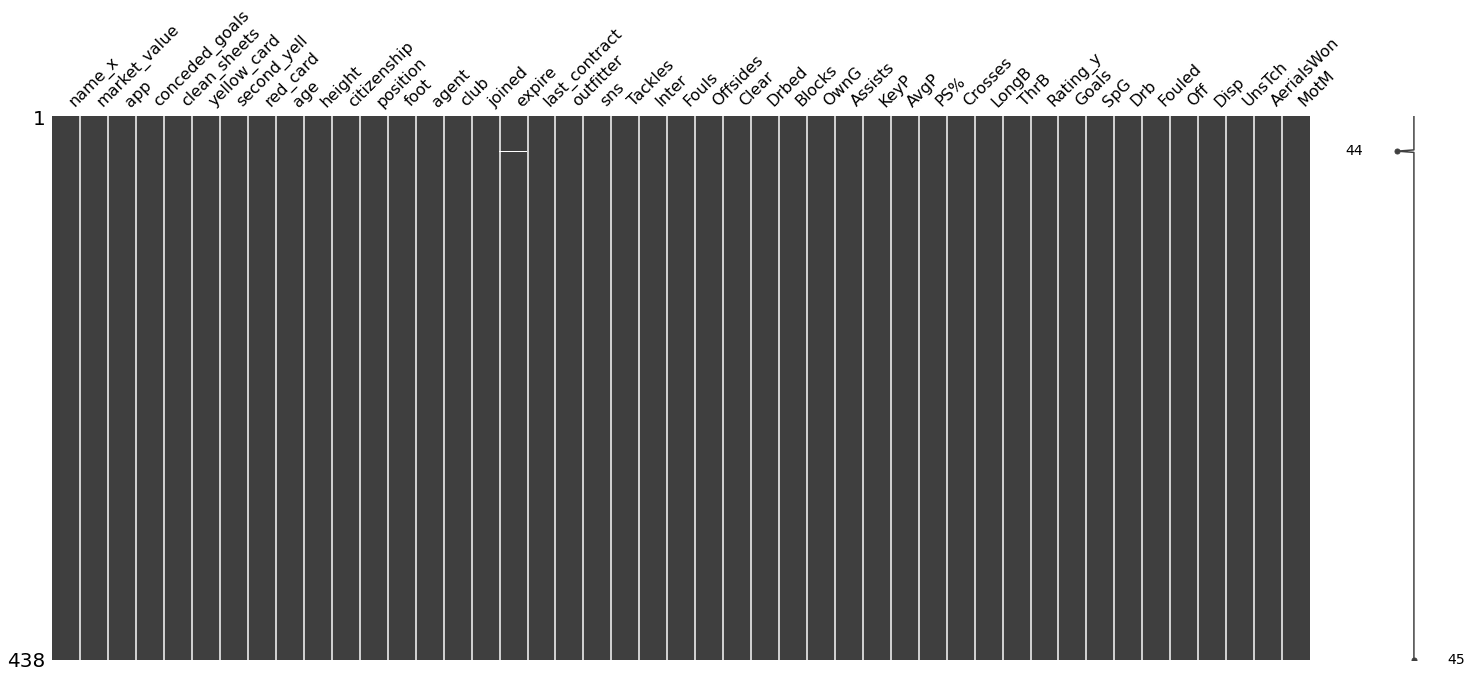

In [29]:
msno.matrix(premier_df);

In [30]:
# 만기일이 없는 players
premier_df[premier_df['expire'].isnull()]

,name_x,market_value,app,conceded_goals,clean_sheets,yellow_card,second_yell,red_card,age,height,citizenship,position,foot,agent,club,joined,expire,last_contract,outfitter,sns,Tackles,Inter,Fouls,Offsides,Clear,Drbed,Blocks,OwnG,Assists,KeyP,AvgP,PS%,Crosses,LongB,ThrB,Rating_y,Goals,SpG,Drb,Fouled,Off,Disp,UnsTch,AerialsWon,MotM
28,RhysWilliams,4500000.0,3,1,0,1,0,0,20,195,1,Defender,right,ICM Stellar Sports,Liverpool FC U23,2019-7-1,None,2019-2-26,adidas,1,0.3,0.8,0.3,0.5,2.0,0,0,0,0,0.3,52.8,88.2,0,1.0,0.3,6.46,0,0.3,0,0.3,0,0,0,3.5,0


In [31]:
premier_df.reset_index(drop=True, inplace=True)
print(premier_df.shape)
premier_df.tail()

(438, 45)


,name_x,market_value,app,conceded_goals,clean_sheets,yellow_card,second_yell,red_card,age,height,citizenship,position,foot,agent,club,joined,expire,last_contract,outfitter,sns,Tackles,Inter,Fouls,Offsides,Clear,Drbed,Blocks,OwnG,Assists,KeyP,AvgP,PS%,Crosses,LongB,ThrB,Rating_y,Goals,SpG,Drb,Fouled,Off,Disp,UnsTch,AerialsWon,MotM
433,RobertSnodgrass,1800000.0,11,0,0,2,0,0,33,182,1,attack,left,SMI Sports Management,West Bromwich Albion,2021-1-8,2022-6-30,2019-8-31,Nike,2,2.1,0.1,1.0,0.1,1.5,0.8,0.3,0,0,0.4,16.5,78.8,0.4,0.5,0,6.51,0,0.5,0.5,1.6,0.1,0.5,1.0,1.1,0
434,KarlanGrant,8100000.0,18,1,0,1,0,0,23,183,1,attack,right,ICM Stellar Sports,West Bromwich Albion,2020-10-15,2026-6-30,2019-8-31,adidas,2,0.3,0.3,0.5,0,0.8,0.1,0,0,0,0.2,11.7,75.2,0,0.1,0,6.19,1,0.9,0.5,0.7,0.3,0.8,1.7,0.7,1
435,CallumRobinson,5400000.0,25,5,0,0,0,0,26,178,1,attack,right,Wasserman,West Bromwich Albion,2020-9-9,2025-6-30,2019-8-31,adidas,2,0.2,0.2,0.1,0,0.3,0.6,0,0,0,0.6,14.4,74.0,0.2,0.4,0,6.44,5,1,0.6,0.7,0.3,0.8,1.5,0.7,1
436,MbayeDiagne,2700000.0,13,2,2,2,0,0,29,191,1,attack,right,GOAL CLUB,West Bromwich Albion,2021-1-29,2021-6-30,2019-8-31,adidas,1,0.3,0.1,1,0,1.0,0.2,0.1,0,2,0.6,15.8,63.6,0.2,0.6,0,6.76,2,1.7,0.8,1.6,1.2,1.2,1.6,3.6,1
437,HalRobsonKanu,1620000.0,15,0,0,1,0,0,31,183,1,attack,left,no agent,West Bromwich Albion,2016-8-31,2021-6-30,2017-7-6,adidas,2,0.1,0.1,0.7,0,0.3,0.1,0,0,0,0.1,2.7,70,0,0.1,0,5.98,0,0.3,0.3,0.5,0.1,0.9,1.3,0.1,0


In [32]:
premier_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438 entries, 0 to 437
Data columns (total 45 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name_x          438 non-null    object 
 1   market_value    438 non-null    object 
 2   app             438 non-null    object 
 3   conceded_goals  438 non-null    object 
 4   clean_sheets    438 non-null    object 
 5   yellow_card     438 non-null    object 
 6   second_yell     438 non-null    object 
 7   red_card        438 non-null    object 
 8   age             438 non-null    object 
 9   height          438 non-null    object 
 10  citizenship     438 non-null    int64  
 11  position        438 non-null    object 
 12  foot            438 non-null    object 
 13  agent           438 non-null    object 
 14  club            438 non-null    object 
 15  joined          438 non-null    object 
 16  expire          437 non-null    object 
 17  last_contract   438 non-null    obj